In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

![](img/574_banner.png)

# Lab 4: Fun with Spatial Data


## Table of Contents
<hr>

<div class="toc"><ul class="toc-item"><li><span><a href="#Instructions" data-toc-modified-id="Instructions-2">Instructions</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li><li><span><a href="#Exercise-1:-How-far-do-I-ride?" data-toc-modified-id="Exercise-1:-How-far-do-I-ride?-4">Exercise 1: How far do I ride?</a></span></li><li><span><a href="#Exercise-2:-How-high-can-they-build?" data-toc-modified-id="Exercise-2:-How-high-can-they-build?-5">Exercise 2: How high can they build?</a></span></li><li><span><a href="#Exercise-3:-How-much-does-it-cost?" data-toc-modified-id="Exercise-3:-How-much-does-it-cost?-6">Exercise 3: How much does it cost?</a></span></li><li><span><a href="#Exercise-4:-How-far-will-you-go?" data-toc-modified-id="Exercise-4:-Shortest-path-analysis-7">Exercise 4: Shortest path analysis</a></span></li></ul></div>

## Instructions
<hr>

rubric={mechanics:5}

You will receive marks for correctly submitting this assignment. To submit this assignment you should:
1. Push your assignment to your GitHub repository. **https://github.ubc.ca/mds-2024-25/DSCI_574_lab4_long1640.git**
2. Upload the lab `.ipynb` file to Gradescope. 
3. Double check if all the plots are rendered properly on Gradescope and the autograder returns your score.
4. If your notebook is too heavy to be rendered on Gradescope, please attach a `.html` as well.

## Imports
<hr>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import keplergl
import osmnx as ox
import numpy as np
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from scripts.utils import pixel2poly
from pykrige.ok import OrdinaryKriging
import base64
import IPython

# Plotting defaults
plt.style.use('ggplot')
px.defaults.height = 400; px.defaults.width = 620
plt.rcParams.update({"font.size": 14, "axes.labelweight": "bold", "lines.linewidth": 2, "figure.figsize": (6, 6)})

## Exercise 1: How far do I ride? 

<hr>

This exercise is all about getting practice working with vector data, geometries, and `geopandas`. This time we'll be working with some data of a bike ride from downtown Vancouver to UBC (directly exported from the Strava app if you know it).

### 1.1.

rubric={accuracy:10}

In your lab repo is a file `data/bike-ride.csv`. It contains latitude and longitude pairs from a bike ride from downtown Vancouver to UBC.

Your tasks:
1. Load the data into a regular `pandas` DataFrame;
2. Create a `LINESTRING` geometry (i.e., a line) from the latitudes and longitudes in that file. We didn't specifically do this in lecture, but you can do it using the `shapely` function `LineString()` (which we imported at the top of the notebook). You need to pass a list of "coordinates" (as `(longitude, latitude)` tuples) to that function to create a line - there's lots of ways to make a list of tuples but hint: `coordinates=zip(longitude, latitude)`.
3. Create a GeoDataFrame with the geometry column containing your `LineString`. Specify the projection "EPSG:4326" (standard for lat/lon coordinates) using the `crs` argument. Note that your GeoDataFrame will only have a single row, as we only have a single geometry here (a line).
4. Estimate the total length of the ride **in meters**. Hint: you'll need to temporarily convert to a meter-based projection (I recommend "EPSG:3347") and use the `.length` attribute.

In [37]:
# Your answer goes here.
df = pd.read_csv("data/bike-ride.csv")
df.head()

,Longitude,Latitude
0,-123.121691,49.278345
1,-123.121619,49.278298
2,-123.121624,49.278263
3,-123.121628,49.278227
4,-123.121633,49.278192


In [38]:
cordinates = zip(df['Longitude'], df['Latitude'])
linestring = LineString(cordinates)
gdf = gpd.GeoDataFrame(geometry=[linestring], crs= "EPSG:4326")
gdf

,geometry
0,"LINESTRING (-123.12169 49.27834, -123.12162 49..."


In [39]:
gdf_m = gdf.to_crs("EPSG:3347")
print(f'The total length of the ride is {gdf_m["geometry"].length[0]} m')

The total length of the ride is 8486.553551315024 m


In [40]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

### 1.2.

rubric={viz:5}

In your lab repo there a shapefile `data/vancouver-fsa` that contains polygons of FSAs ([forward sortation areas](https://www.ic.gc.ca/eic/site/bsf-osb.nsf/eng/br03396.html) - which are just groups of postcodes) in Vancouver - it's the same data we made in Lecture 7.

Load that shapefile into a new GeoDataFrame and then, using the `geopandas` in-built plotting functionality, plot the bicycle ride on top of the map of Vancouver.

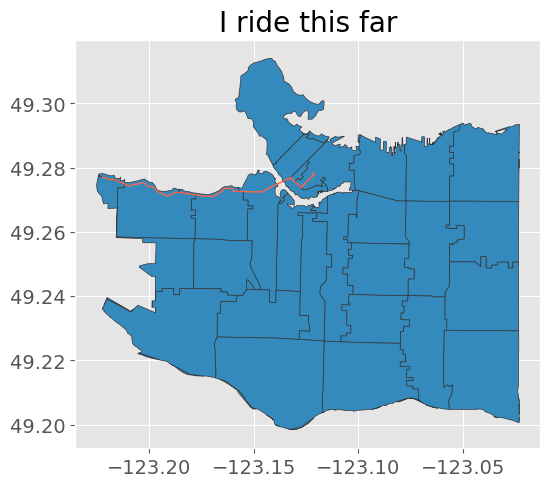

In [45]:
# Your answer goes here.
fsa = gpd.read_file("data/vancouver-fsa")
fsa = fsa.to_crs("EPSG:4326")
ax = fsa.plot(edgecolor="0.2")
gdf.plot(ax=ax, edgecolor="tomato", linewidth=1)
plt.title("I ride this far");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 1.3.

rubric={accuracy:5}

Your last task is to programmatically calculate how many FSAs were rode through on the ride (i.e., write code to do this, don't just count them with your eyes!). Remember, questions like this can be very easily answered with a spatial join (`gpd.sjoin()`)!

In [50]:
# Your answer goes here.

joined_data = gpd.sjoin(fsa, gdf, how="inner", predicate="intersects")
joined_data

,CFSAUID,PRUID,PRNAME,geometry,index_right
4,V6T,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.22388 49.27739, -123.22336 49.2...",0
7,V6Z,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.12405 49.27991, -123.12564 49.2...",0
12,V6B,59,British Columbia / Colombie-Britannique,"MULTIPOLYGON (((-123.11493 49.28847, -123.1149...",0
14,V6E,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.12278 49.2888, -123.1222 49.289...",0
23,V6J,59,British Columbia / Colombie-Britannique,"MULTIPOLYGON (((-123.1498 49.2779, -123.1498 4...",0
24,V6K,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.17265 49.27171, -123.17104 49.2...",0
33,V6R,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.21376 49.27669, -123.21346 49.2...",0


In [49]:
print(f'The ride was through {len(joined_data)} FSAs')

The ride was through 7 FSAs


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 2: How high can they build? 
<hr>

rubric={viz:20}

In this exercise I'll get you to make a cool 3D plot of downtown Vancouver building heights using `kepler.gl`. Your tasks:

1. Load downtown Vancouver building footprints into a GeoDataFrame using `osmnx`. Use the `ox.features_from_place()` function and search for "Vancouver, Canada" and don't forget to set `tags={"building":True}` to get building footprints! You should also drop any point geometries in the loaded data - we only care about polygons (see Lecture 7 for code help).
2. Download downtown Vancouver buidling heights from the [City of Vancouver Open Data Portal here](https://opendata.vancouver.ca/explore/dataset/building-footprints-2009/map/?location=11,49.25633,-123.14257).
    - You should use the polygon selection tool to select only data in downtown Vancouver as in the screenshot below:
![](img/selection-tool.png)
    - Then export the data as a shapefile by clicking the "Export" tab and choosing the shapefile export:
![](img/export.png)

>Just save the downloaded data locally (don't push it to Github) because the data size is quite large.

3. Load in your freshly downloaded building height data to a GeoDataFrame and then spatially join the building heights to the building footprints (like I did in lecture). The column "`hgt_agl`" is the one with the buidling heights (columns are described [here](https://opendata.vancouver.ca/explore/dataset/building-footprints-2009/information/));
4. Finally, use `keplergl` to make a map of the data and customize it using the GUI to be a 3D map.

I did this whole mapping process with a different dataset in Lecture 8, so refer to that for code help.

To actually show the height of the map, you need to enable `3D map` and specify the `height` option as shown below:

<img src="img/height.png" alt="Drawing" style="width: 500px;"/> 


>Your `keplergl` figure won't render on Github so in order to grade this exercise, please **just take a screenshot of it and include it below**.

In [57]:
# Your answer goes here.
import json
config = json.load(open('data/ubc_config.json', 'r'))

downtown = (ox.features_from_place("Vancouver, Canada", tags={'building':True})
         .loc[:, ["geometry"]]                 # just keep the geometry column for now
         .loc[lambda df: [g.type == 'Polygon' for g in df.geometry]] 
         .assign(Label="Building Footprints")  # assign a label for later use
         .reset_index(drop=True)               # reset to 0 integer indexing
      )

downtown_bldg_heights = gpd.read_file("data/building-footprints-2009")

downtown_bldg_heights = (gpd.sjoin(downtown.drop(columns='Label'), downtown_bldg_heights[["hgt_agl", "geometry"]], how="inner")
                       .drop(columns="index_right")
                       .rename(columns={"hgt_agl": "Height"})
                       .reset_index()
                       .dissolve(by="index", aggfunc="mean")  # dissolve is like "groupby" in pandas. We use it because it retains geometry information
                        )

# Create keplergl plot
downtown_height_map = keplergl.KeplerGl(height=500, config=config)
downtown_height_map.add_data(data=downtown_bldg_heights.copy(), name="Building heights")

# # Use the following code to render your kepergl map in jupyter lab
# # Assuming you create a keplergl map object called downtown_heights_map

orig_html = str(downtown_height_map._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
IPython.display.HTML(framed_html)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


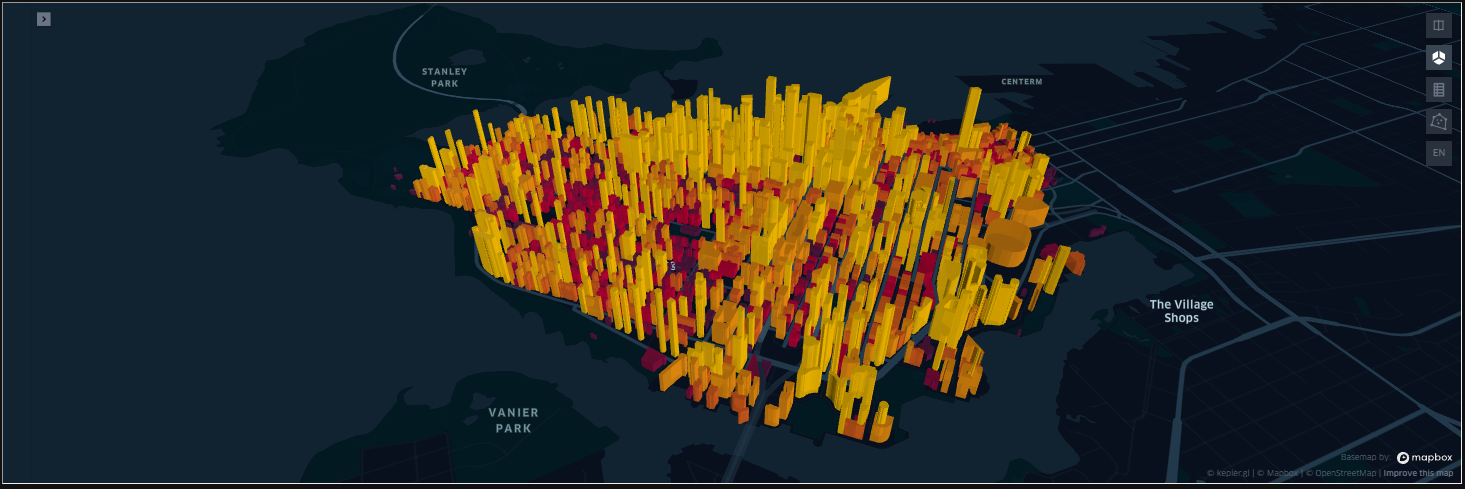

<!-- END QUESTION -->

## Exercise 3: How much does it cost? 
<hr>

In this exercise, we'll walk through some spatial interpolation. In particular we'll look at kriging. We went over this at a very high level in lecture. There's so much to learn about kriging and it's really getting into the GIS world which we don't have time to explore. I just want you to have an idea of the kind of things you can do with spatial data and to know where to start looking if you do have to do a job that involves spatial interpolation in the future - I don't expect you or need you to know the details of the kriging model! We'll be mostly mimicking the worklflow I did in Lecture 8 so feel free to refer to it for code help.

We are going to be using a sample of the daily cost of AirBnB's currently around Vancouver to interpolate the daily cost across all of Vancouver to get a sense of which areas are the cheapest/most expensive to stay in! Before we get started, what areas do you think will be most expensive? Kitsilano? Downtown? Let's see what the data says...

<!-- BEGIN QUESTION -->

### 3.1.

rubric={accuracy:5}

We'll get our data from [Inside AirBnB](http://insideairbnb.com/index.html). You can get the most recent summary of AirBnB listings for Vancouver from this url: "http://data.insideairbnb.com/canada/bc/vancouver/2021-02-09/visualisations/listings.csv", load that data into a dataframe directly with `pandas`. Filter the dataframe so it only includes data where `price < 500` and `number_of_reviews > 0`.

In [ ]:
# Your answer goes here.

...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.2.

rubric={accuracy:5}

Create a new `GeoDataFrame` from your AirBnB data. You'll need to create the geometry column using the function `gpd.points_from_xy()` like we did in lecture 7.

In [ ]:
# Your answer goes here.

...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.3.

rubric={viz:5}

Make a scatterplot of your dataframe using the `plotly.express` function `px.scatter_mapbox()`. Be sure to specify the argument `mapbox_style` to a style that does not require an API token (the default [does require a token](https://plotly.com/python/mapbox-layers/) and your code will output nothing). Take a look at the docstring for examples, or see the code examples in Lecture 8.

List of mapbox_tyle that does not require an API token: "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor"

In [ ]:
# Your answer goes here.

...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.4.

rubric={accuracy:5}

Now it's time to create a grid of spatial locations and interpolate over them. I went through this exact process in Lecture 8, so use that as your guide! But basically, the tasks are as follows:

1. Convert your geodataframe to the linear meter-based Lambert projection (recommend by Statistics Canada). The code is "EPSG:3347".
2. Add an "Easting" and "Northing" column to your geodataframe.
3. Make a vector of x values and y values that define a grid (I called them `gridx` and `gridy` in the lecture notes) using a resolution of 250 m.
4. Interpolate the data using `pykrige.ok.OrdinaryKriging` (which we imported at the top of the notebook). You'll have to [install](https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/#installation) `pykrige` if you don't have it installed: `conda install -c conda-forge pykrige`.

Once again, see the lecture 8 notes for an example of how to do all this.

In [ ]:
# Your answer goes here.

...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.5.

rubric={accuracy:10}

Finally, we can re-project our inteprolated data back to a map. You'll need to:
1. Convert your interpolated raster data to polygons using the `pixel2poly()` function I used in lecture and included with your lab (we imported it at the top of the notebook).
2. Create a geodataframe of your new polygons and interpolated values. You should specify in the geodataframe creation that your polygon coordinates are in `crs="EPSG:3347"`. But then convert the geodataframe to the degrees based WGS 84 project (`.to_crs("EPSG:4326")`) so that we can plot it.
3. Clip this geodataframe with a polygon of Vancouver loaded using `ox.geocode_to_gdf("Vancouver, Canada")`. 
4. Finally, plot your interpolated data and bathe in the glory of your awesome mapping skills! (Hopefully you should see that Kitsilano and Downtown are the most expensive places to stay - which is not surprising!)

Once again, see the lecture 8 notes for an example of this workflow.

In [ ]:
# Your answer goes here.

...

<!-- END QUESTION -->

## Exercise 4: Shortest path analysis
<hr>

In this exercise, we'll construct simple shortest path routing between selected source and destination addresses using `NetworkX` and `OSMnx`. Let's say I wanted to know what is the shortest path for cycling from Waterfront, Vancouver to BC Place, Vancouver.

<!-- BEGIN QUESTION -->

### 4.1. 

rubric={accuracy:3}

Load a bike network in Downtown, Vancouver using the function `ox.graph_from_place()`. You can specify the network type using the `network_type` argument. Possible options are "all_private", "all", "bike", "drive", "drive_service", "walk"

Save the output object as `G`

In [ ]:
...

### 4.2. 

rubric={viz:2}

Plot your bike network using `ox.plot_graph_folium()`. Note that the `folium` module has been deprecated, so you can use `ox.plot.plot_graph()` as an alternative, but it just won't be as pretty. 

In [ ]:
...

### 4.3. 

rubric={accuracy:3}

Create origin and destination using [`ox.geocode()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geocoder.geocode), print out the coordinates of origin and destination

In [ ]:
...

### 4.4. 

rubric={accuracy:3}

Find the closest nodes for origin and destination using [`ox.distance.nearest_nodes()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_nodes), make sure the return the distance from the nearest node to the origin/destination by setting `return_dist=True`. 

Print out the distance from the nearest nodes

In [ ]:
...

### 4.5. 

rubric={accuracy:3}

Find the the shortest path by length using [`nx.shortest_path()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html). Remember to set the `weight` parameter as the `length` of each edge. Save the output object as `route`

Side note: The default method for computing the shotest path in nx.shortest_path is the `dijkstra` algorithm. If you are curious about how it works, here's a good [video](https://www.youtube.com/watch?v=EFg3u_E6eHU) that explains the algorithm

In [ ]:
...

### 4.6. 

rubric={viz:3}

Plot the shortest path with [`ox.plot_route_folium()`](https://osmnx.readthedocs.io/en/stable/user-reference.html).

In [ ]:
...

### 4.7

rubric={accuracy:3}

Calcualte the length of the shortest path using `nx.shortest_path_length()` function. 
- Print out the shorest path distance in km
- Calculate and print out the travel time (assuming the average cycling speed is 13km/h)

Compare your result with google maps:
https://www.google.com/maps/dir/Waterfront+Station,+601+W+Cordova+St,+Vancouver,+BC+V6B+1G1/BC+Place,+Pacific+Boulevard,+Vancouver,+BC/@49.2813719,-123.1183789,16z/data=!3m2!4b1!5s0x5486717ce3307959:0xbb811745f65fed95!4m14!4m13!1m5!1m1!1s0x548671780b92ff0f:0xa86a935aaf27902c!2m2!1d-123.1116911!2d49.285871!1m5!1m1!1s0x5486717cfcbee0d5:0xf9404dfd918218bb!2m2!1d-123.111999!2d49.27675!3e1

In [ ]:
...

<!-- END QUESTION -->

